# Spam Detection using NLP

### Doing the necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import nltk

In [4]:
from nltk.corpus import stopwords

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])
#reading the data from a CSV file into a dataset

In [6]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

**We see that there a 747 spam and 4825 non-spam messages in the given dataset. There is repetition of a same message many times**

### Feature Engineering

**Extracting the length of every message and storing it in a new column in the given dataset**

In [10]:
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 0, 'Length of message')

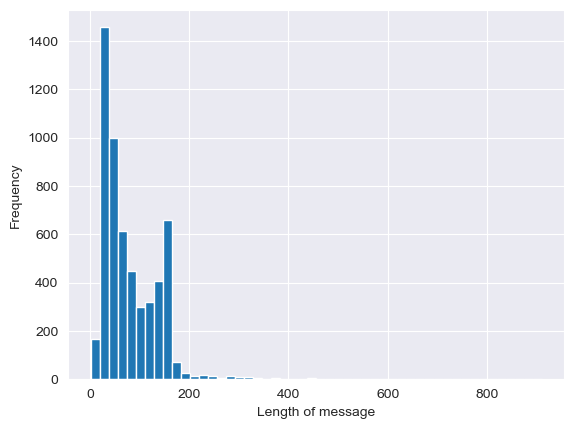

In [13]:
sns.set_style('darkgrid')
messages['length'].plot.hist(bins=50)
plt.xlabel('Length of message')

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

**We see that the length of the longest message is 910 words. The messsage is read below**

In [16]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

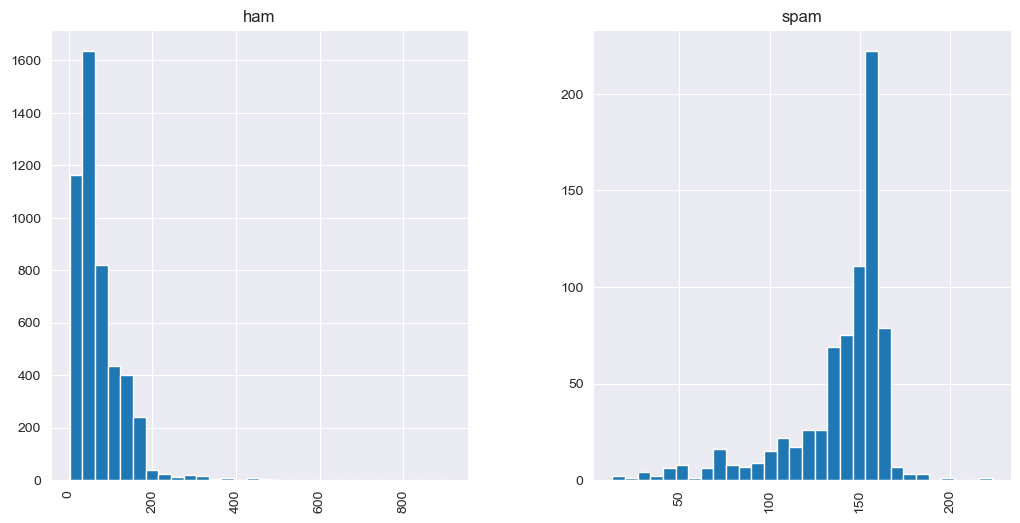

In [20]:
messages.hist(column='length',bins=30,by='label',figsize=(12,6))

**We see a pattern that generally if the length of the message is small, then the message is non-spam and if it is very long, then the message is spam. This is just a general observation and doesn't apply completely. It would be a major factor used in classifying the messages**

### Normalizing the text data

**Given a message, we need to remove the punctuations and common words which are redundant in the process of classifying the messages as spam or not**

In [34]:
ex_msg = 'Message, with punctuation in it!!'

In [22]:
from string import punctuation

In [23]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
ex_msg = [word for word in ex_msg if word not in punctuation]

In [36]:
ex_msg

['M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 'i',
 't']

**Stopwords is a list of common English words which can be ignored in the process of classification**

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
example_msg = ''.join(ex_msg)

In [46]:
example_msg

'Message with punctuation in it'

In [47]:
example_msg = [word for word in example_msg.split() if word not in stopwords.words('english')]

In [48]:
example_msg

['Message', 'punctuation']

In [89]:
#We can generalize the above process by creating a function to
#1.remove punctuation
#2.remove stopwords and apply it to the 'messages' column in the dataset**

In [49]:
def process_text(mess):
    '''
    1. remove punctuation
    2. remove stopwords
    3. return cleaned words
    '''
    mess = [word for word in mess if word not in punctuation]
    mess = ''.join(mess)
    mess = [word for word in mess.split() if word not in stopwords.words('english')]
    return mess

In [50]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [51]:
messages['message'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

### Train test split

**To train and test the model on a dataset, first we need to split the data. One part would be used to train the model. Then the other part would be used to test the trained model. Here we're splitting the dataset in the ratio 30:70**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [55]:
msg_train

1391    I wonder how you got online, my love ? Had you...
4049    Lol or I could just starve and lose a pound by...
4396    Only just got this message, not ignoring you. ...
4261        Are you plans with your family set in stone ?
1513    Hey sweet, I was wondering when you had a mome...
                              ...                        
1272    If you still havent collected the dough pls le...
4369    1 I don't have her number and 2 its gonna be a...
4493                         Probably a couple hours tops
1352                       Yo theres no class tmrw right?
797     Orange customer, you may now claim your FREE C...
Name: message, Length: 3900, dtype: object

Now, we have the text messages in a normalized form. For Scikit Learn to work with the text provided, it needs to be vectorized.
Machine learning models can work with the vectorized form of messages.

We can do that in the following1 steps using the bag-of-words model:

1. Count how many times does a word occur in each message (term frequency)

2. Weigh the counts, so that frequent words get lower weight (inverse document frequency)

**We need to convert the words of a text message into tokens by replacing the words with their frequency in the text message. This can be achieved using "CountVectorizer" model, which will transform the words into tokens corresponding to their frequency**

**TF-IDF stands for term frequncy - inverse document frequency. TF gives the frequncy of a word in the message while IDF denotes the weight of the word in the message**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
from sklearn.ensemble  import RandomForestClassifier

We are using a pipeline to  combine the 3 processes,  which include:
1. Creating a bag-of-words using CountVectorizer
2. Noting the frequency and weight of each word in every message
3. Classifying the messages as spam or not using a classification algorithm

In [58]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [59]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x00000276E0CACB80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Model Evaluation

In [60]:
predictions = pipeline.predict(msg_test)

In [61]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1440
        spam       1.00      0.71      0.83       232

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



**We get an accuracy score of 0.96 using Naive Bayes classifier. Let us see the performance of the model using a Random Forest Classifier**

In [66]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [67]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x00000276E0CACB80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [68]:
predictions = pipeline.predict(msg_test)

In [69]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1440
        spam       0.99      0.76      0.86       232

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



**We get an accuracy score of 0.97 in this case which is slightly better than the previous classifier**

We can try some examples to test the model

In [81]:
pipeline.predict(['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'])[0]

'spam'

In [84]:
messages[messages['label']=='spam']['message'].iloc[19]

'PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires'

In [86]:
pipeline.predict(['Hello, I had called u in the evening. please pick up the phone'])[0]

'ham'